Nepieciešamās bibliotēkas/Necessary libraries:
* matplotlib
* numpy
* math
* time
* ffmpeg (jāpienstalē gan bibliotēka, gan ffmpeg distributīvs no https://ffmpeg.org/)/(must install both python package, as well as ffmpeg distributive from https://ffmpeg.org/)
* IPython
* cellulod

Radius(r): 100


<IPython.core.display.Javascript object>


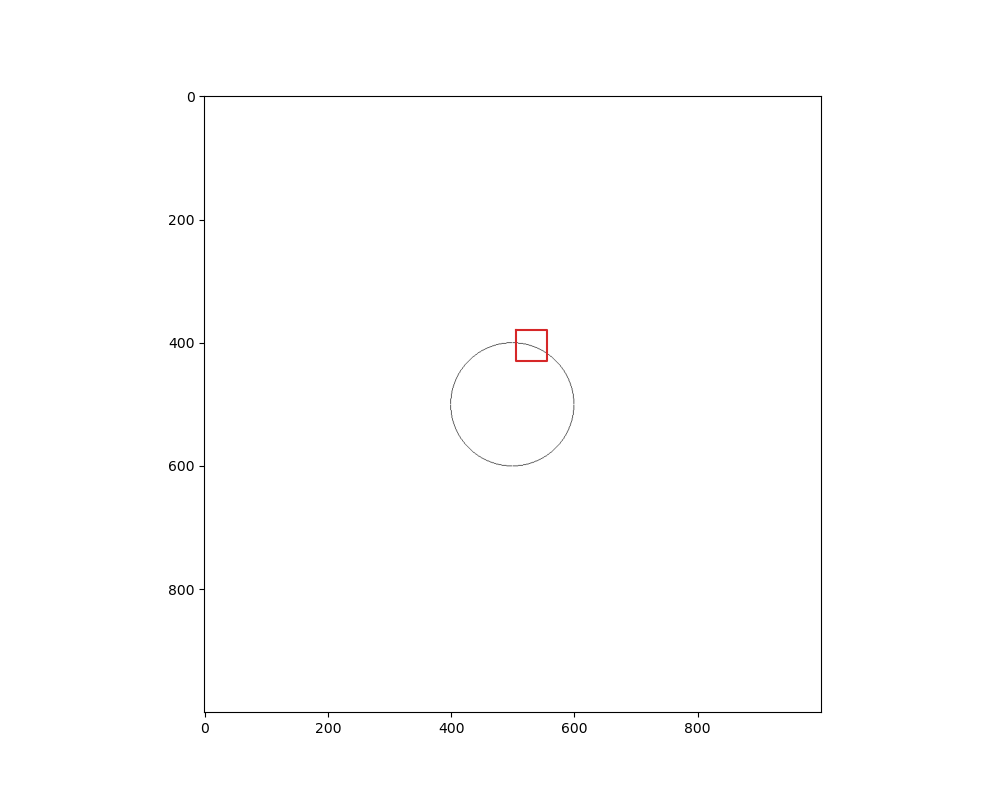

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
import time
from IPython.display import clear_output

from celluloid import Camera

#%matplotlib notebook

#Tukšs attēls/Blank image
img = np.ones((1000,1000,3))

#Sākotnējie parametri/Initial parameters
center=500

r=int(input("Radius(r): "))

point1 = ((center+r)-25,(center+r)-25)
point2 = ((center+r)+25,(center+r)-25)
point3 = ((center+r)+25,(center+r)+25)
point4 = ((center+r)-25,(center+r)+25)

#Zīmē objektu/Draws the object
def MoveObject(x1, y1, x2, y2, x3, y3, x4, y4):
    angle=0
    xc=0
    yc=0
    while angle<4*3.14:
        x1 = (center) -25 + (math.cos(angle)*r)
        y1 = (center) -25 + (math.sin(angle)*r)
        x2 = (center) +25 + (math.cos(angle)*r)
        y2 = (center) -25 + (math.sin(angle)*r)
        x3 = (center) +25 + (math.cos(angle)*r)
        y3 = (center) +25 + (math.sin(angle)*r)
        x4 = (center) -25 + (math.cos(angle)*r)
        y4 = (center) +25 + (math.sin(angle)*r)
        angle+=0.1
        x5 = [x1,x2,x3,x4,x1]
        y5 = [y1,y2,y3,y4,y1]
        plt.imshow(img)
        plt.plot(x5,y5)
        camera.snap() #uznem uzzimeta frame attelu un saglaba to prieks animacijas/Snap the frame and save it for animation

#Lai uzzimetu liniju pa kuru kustas objekts/This draws the circle line
def Circle(xc,yc):
    xk=0
    yk=r
    pk=1-r
                                       
    while yk>xk:
        if pk<0:
            xk+=1
            yk=yk
            pk=pk+2*xk+1
        else:
            xk+=1
            yk-=1
            pk=pk+2*xk-2*yk+1

        img[xc+xk, yc+yk] = (0,0,0)
        img[xc-xk, yc+yk] = (0,0,0)
        img[xc+yk, yc+xk] = (0,0,0)
        img[xc-yk, yc+xk] = (0,0,0)
        img[xc+xk, yc-yk] = (0,0,0)
        img[xc-xk, yc-yk] = (0,0,0)
        img[xc+yk, yc-xk] = (0,0,0)
        img[xc-yk, yc-xk] = (0,0,0)

Circle(center,center)

fig = plt.figure(figsize=(10,8), dpi = 100, facecolor='w')

camera = Camera(fig) 

MoveObject(point1[0],point1[1],point2[0],point2[1],point3[0],point3[1],point4[0],point4[1])

anim = camera.animate(blit=False, interval=10)
anim.save('animation_circle.mp4')